**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [90]:
# write your code here
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from ipywidgets import interactive, fixed
from scipy import optimize
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar
import math
import warnings
warnings.filterwarnings("ignore")

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [91]:
# write your code here

# Step 1: Creating symbols for the relevant variables for sympy
w = sm.symbols('w')
tau = sm.symbols('tau')
G = sm.symbols('G')
C = sm.symbols('C')
alpha = sm.symbols('alpha')
v = sm.symbols('v')
L = sm.symbols('L')
kappa = sm.symbols('kappa')
w_tilde = sm.symbols('w_tilde')


# Step 2: Creating the optimizer


utility_func = sm.ln(C**(alpha) * G**(1 - alpha)) - v * ((L**2)/2)




# Step 3: Creating constraints


C_con = kappa + (1 - tau) * w * L


w_con = (w_tilde/(1 - tau))


# Substitute for C


utility_func_sub_1 = utility_func.subs(C, C_con)




# Substitute for w


utility_func_subs = utility_func_sub_1.subs(w, w_con)


# FOC


foc = sm.diff(utility_func_subs, L)


# Simplify the FOC
simplified_foc = sm.cancel(foc)




solutions = sm.solve(simplified_foc, L, dict=True)


# Display all solutions
for solution in solutions:
   sm.Eq(L, solution[L])


desired_solution = solutions[1][L]
display(desired_solution)






objective_func = ((-kappa + sm.sqrt(kappa**2 + 4 * (alpha/v) * w_tilde**2))/(2 * w_tilde))
display(objective_func)




# Evaluate the expressions for specific values
variable_values = {
   w: 1,
   tau: 0.3,
   alpha: 0.5,
   v: (1/(2 * 16**2)),
   kappa: 1,
   w_tilde: 0.7
}


evaluated_desired_solution = desired_solution.evalf(subs=variable_values)
evaluated_objective_func = objective_func.evalf(subs=variable_values)


# Compare the evaluated values for numerical equivalence
if sm.Abs(evaluated_desired_solution - evaluated_objective_func) < 1e-6:
   print("The expressions are numerically equivalent.")
else:
   print("The expressions are not numerically equivalent.")


(-kappa*v + sqrt(v*(4*alpha*w_tilde**2 + kappa**2*v)))/(2*v*w_tilde)

(-kappa + sqrt(4*alpha*w_tilde**2/v + kappa**2))/(2*w_tilde)

The expressions are numerically equivalent.


We get the same optimallabor supply choice. For our result v is not being simplified but if it would be simplified we would get this solution $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

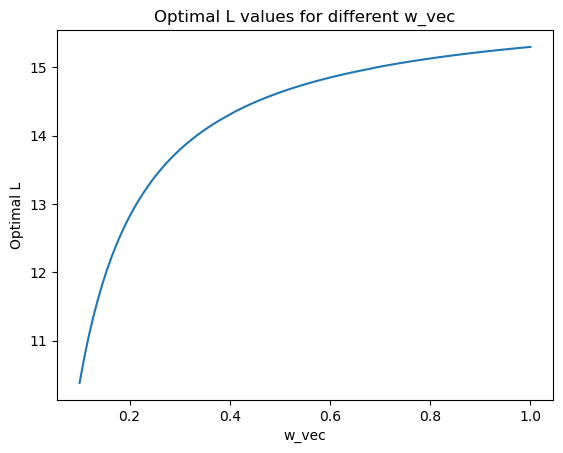

In [92]:
# write your code here

# The baseline parameters
alpha = 0.5
kappa = 1.0
v = 1 / (2 * 16 ** 2)
w = 1.0
w_vec = np.linspace(0.1, 1, 100)
tau = 0.3
G = 1.5




# Create the Utility function
def utility_func(L, alpha, kappa, tau, w, G, v):
   utility = math.log(((kappa + (1 - tau) * w * L) ** alpha) * (G ** (1 - alpha)))
   disutility = -v * (L ** 2 / 2)
   return utility + disutility


# Define Objective Function
def objective_1(L):
   return -utility_func(L, alpha, kappa, tau, w, G, v)


# Define the bounds for L
bounds = [(0, 24)]  # L should be non-negative


# Initialize a list to store optimal L values
optimal_L_values = []


# Solve the optimization problem for each w in w_vec
for w in w_vec:
   # Solve the optimization problem
   result = minimize(objective_1, x0=[0], bounds=bounds)
  
   # Extract the optimal solution
   optimal_L = result.x[0]
  
   # Store the optimal L value
   optimal_L_values.append(optimal_L)


# Create a plot
plt.plot(w_vec, optimal_L_values)
plt.xlabel('w_vec')
plt.ylabel('Optimal L')
plt.title('Optimal L values for different w_vec')
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


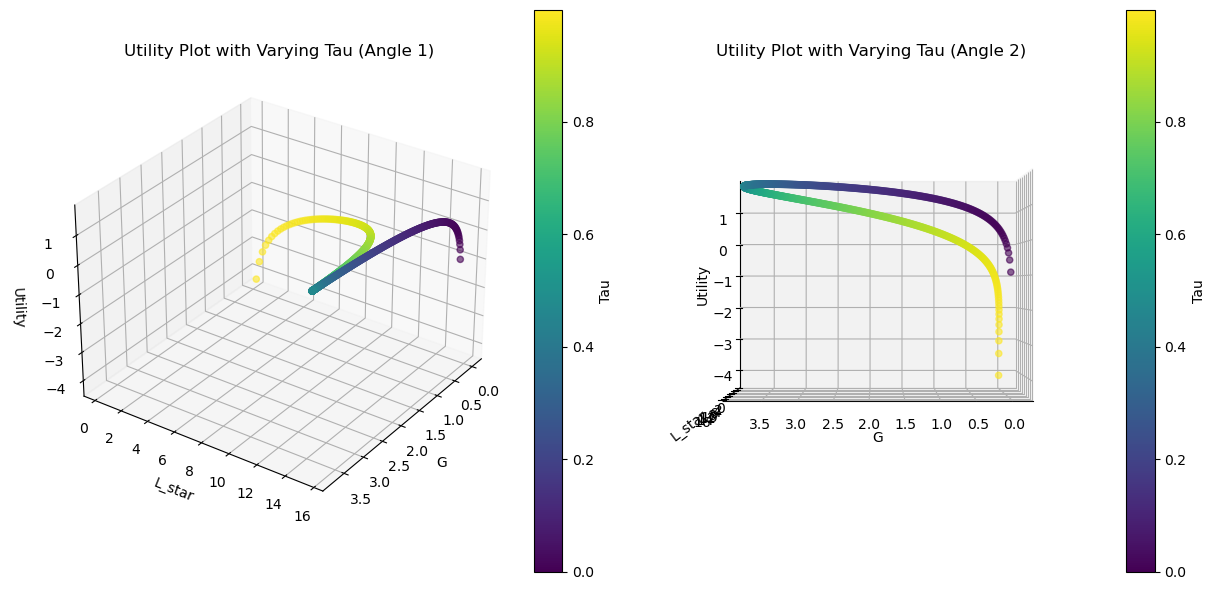

In [93]:
# write your code here
# define the parameters 
alpha = 0.5
kappa = 1.0
v = 1/(2 * (16**2))
w = 1.0


tau_values = np.linspace(0, 1, 1000, endpoint=False)  # Generate 100 equally spaced tau values between 0 and 1

L_star_values = []
G_star_values = []
utility_values = []
tau_color_values = []  # Store tau values for color mapping

for tau in tau_values:
    L_star = ((-kappa + np.sqrt(kappa**2 + 4 * (alpha / v) * ((1 - tau) * w)**2)) / (2 * (1 - tau) * w))
    G_star = tau * w * L_star * ((1 - tau) * w)
    utility = np.log((kappa + (1 - tau) * w * L_star)**(alpha) * G_star**(1 - alpha)) - v * ((L_star**2) / 2)
    L_star_values.append(L_star)
    G_star_values.append(G_star)
    utility_values.append(utility)
    tau_color_values.append(tau)

fig = plt.figure(figsize=(12, 6))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(G_star_values, L_star_values, utility_values, c=tau_color_values, cmap='viridis', alpha=0.6)
ax1.set_xlabel('G')
ax1.set_ylabel('L_star')
ax1.set_zlabel('Utility')
ax1.view_init(elev=30, azim=35)
ax1.set_title('Utility Plot with Varying Tau (Angle 1)')

# Add colorbar to subplot 1
sm1 = plt.cm.ScalarMappable(cmap='viridis')
sm1.set_array(tau_color_values)
cbar1 = plt.colorbar(sm1, ax=ax1)
cbar1.set_label('Tau')

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(G_star_values, L_star_values, utility_values, c=tau_color_values, cmap='viridis', alpha=0.6)
ax2.set_xlabel('G')
ax2.set_ylabel('L_star')
ax2.set_zlabel('Utility')
ax2.view_init(elev=0, azim=90)
ax2.set_title('Utility Plot with Varying Tau (Angle 2)')

# Add colorbar to subplot 2
sm2 = plt.cm.ScalarMappable(cmap='viridis')
sm2.set_array(tau_color_values)
cbar2 = plt.colorbar(sm2, ax=ax2)
cbar2.set_label('Tau')

plt.tight_layout()
plt.show()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [94]:
# write your code here

# The baseline parameters
alpha = 0.5
kappa = 1.0
v = 1 / (2 * 16 ** 2)
w = 1.0


# Define the utility
def utility_ex1d(tau, kappa, w, alpha, v):
   utility = math.log(((kappa + (1-tau)*w*(-kappa + ((kappa**2) + 4 * (alpha/v) * ((1-tau)*w)**2)**0.5)/(2*((1-tau)*w)))**alpha)*(tau * w * (-kappa + ((kappa**2) + 4 * (alpha/v) * ((1-tau)*w)**2)**0.5)/(2*((1-tau)*w))*((1-tau)*w))**(1-alpha))
   disutility = v*(((-kappa + ((kappa**2) + 4 * (alpha/v) * ((1-tau)*w)**2)**0.5)/(2*((1-tau)*w))**2)/2)
   return utility - disutility


def objective_2(tau):
   return -utility_ex1d(tau, kappa, w, alpha, v)


bounds = [(0.00001, 0.99999)]


# Solve the optimization problem
result_1d = minimize(objective_2, x0=0, bounds=bounds)


# Extract the optimal solution
optimal_tau = result_1d.x[0]


# Calculate the optimal utility
optimal_utility = utility_ex1d(optimal_tau, kappa, w, alpha, v)


# Print the optimal tau and utility
print("Optimal tau:", optimal_tau)
print("Optimal utility:", optimal_utility)

Optimal tau: 0.3309888405010223
Optimal utility: 1.806653932446443


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [95]:
# input parameters
epsilon = 1
nu = 1/(2*16**2)
alpha = 0.5
G = np.linspace(1, 10, 10000)
w = 1
tau = optimal_tau
kappa = 1

sigma = [1.001, 1.5]
rho = [1.001, 1.5]

for i, j in zip (sigma, rho):
    for g in G:
        def utility_1e(alpha, g, i, j, nu, L, epsilon, w, tau, kappa):
            numerator = ((alpha * (kappa + (1 - tau) * w * L) ** ((i - 1) / i)) + ((1 - alpha) * g ** ((i - 1) / i))) ** (i / (i - 1))
            numerator = numerator ** (1 - j) - 1
            denominator = 1 - j
            term1 = numerator / denominator
            term2 = nu * (L ** (1 + epsilon)) / (1 + epsilon)
            result = term1 - term2
            return result

        def objective_1e(L):
            return -utility_1e(alpha, g, i, j, nu, L, epsilon, w, tau, kappa)  # Return scalar value

        bounds = [(0, 24)]

        result_1e = minimize(objective_1e, x0=[0], bounds=bounds)  # Provide initial value as a list
        optimal_L_1e = result_1e.x[0]
        condition = tau * w * optimal_L_1e - g
        if abs(condition) < 0.001:  # Adjust the tolerance as needed
            print(f"The following G solves the given equation: {g:.3f} ", ", setup for i and j:", i, ",", j)
            break


The following G solves the given equation: 5.049  , setup for i and j: 1.001 , 1.001
The following G solves the given equation: 3.464  , setup for i and j: 1.5 , 1.5


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [96]:
def utility_1e(alpha, G, sigma, rho, nu, L, epsilon, w, tau, kappa):
    numerator = ((alpha * (kappa + (1 - tau) * w * L) ** ((sigma - 1) / sigma)) + ((1 - alpha) * G ** ((sigma - 1) / sigma))) ** (sigma / (sigma - 1))
    numerator = numerator ** (1 - rho) - 1
    denominator = 1 - rho
    term1 = numerator / denominator
    term2 = nu * (L ** (1 + epsilon)) / (1 + epsilon)
    result = term1 - term2
    return result


def find_optimal_tau(sigma, rho):
    epsilon = 1
    nu = 1 / (2 * 16**2)
    alpha = 0.5
    w = 1
    kappa = 1

    # Define the feasible range for G
    G_range = np.linspace(1, 10, 100)

    max_utility = -np.inf
    optimal_tau = None
    optimal_G = None
    optimal_L_e1 = None
    optimal_utility = None

    for G in G_range:
        def objective(tau):
            # Calculate optimal_L_e1 using the given tau and G
            optimal_L_e1 = G / (tau * w)
            # Compute utility with the calculated optimal_L_e1
            return -utility_1e(alpha, G, sigma, rho, nu, optimal_L_e1, epsilon, w, tau, kappa)

        result = minimize(objective, x0=1)  # Initial guess for tau
        if result.success and -result.fun > max_utility:
            max_utility = -result.fun
            optimal_tau = result.x[0]
            optimal_G = G
            optimal_L_e1 = G / (optimal_tau * w)
            optimal_utility = max_utility

    return optimal_tau, optimal_G, optimal_L_e1, optimal_utility


# Case 1: sigma = 1.001, rho = 1.001
sigma_1 = 1.001
rho_1 = 1.001
optimal_tau_1, optimal_G_1, optimal_L_e1_1, optimal_utility_1 = find_optimal_tau(sigma_1, rho_1)
print("Case 1:")
print("Optimal tau:", optimal_tau_1)
print("Optimal G:", optimal_G_1)
print("Optimal L_e1:", optimal_L_e1_1)
print("Optimal utility value:", optimal_utility_1)
print()

# Case 2: sigma = 1.5, rho = 1.5
sigma_2 = 1.5
rho_2 = 1.5
optimal_tau_2, optimal_G_2, optimal_L_e1_2, optimal_utility_2 = find_optimal_tau(sigma_2, rho_2)
print("Case 2:")
print("Optimal tau:", optimal_tau_2)
print("Optimal G:", optimal_G_2)
print("Optimal L_e1:", optimal_L_e1_2)
print("Optimal utility value:", optimal_utility_2)


Case 1:
Optimal tau: 0.06250008289244534
Optimal G: 1.0
Optimal L_e1: 15.999978779562138
Optimal utility value: 1.1362925144417413

Case 2:
Optimal tau: 0.214303754810156
Optimal G: 2.6363636363636367
Optimal L_e1: 12.301994609002985
Optimal utility value: 1.0180160094692432


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [97]:
# write your code here

# Define the utility function
def profit_2a(l, kappa, eta, w):
   profit = kappa * l**(1-eta) - w*l
   return profit


# Define objective function
def objective_3(l, kappa, eta, w):
   return -profit_2a(l, kappa, eta, w)


# Set the values for eta and w
eta = 0.5
w = 1


# Define a list of kappa values
kappa_values = [1, 2]


print('The numerical solution for the optimal l')


# Iterate over each kappa value
for kappa in kappa_values:
   # Select bounds
   bound = [(0, None)]


   # Solve the optimization problem
   result_2a = minimize(objective_3, x0=0, bounds=bound, args=(kappa, eta, w))


   # Extract optimal solution
   optimal_l = result_2a.x[0]


   # Print the result
   print(f"Optimal l for kappa = {kappa}: {optimal_l:.2f}")




# Analytical Solution for the optimal l


def solve_l_analytical(kappa, eta, w):
  
   l = (((1-eta)*kappa)/w)**(1/eta)
   return l


print('The analytical solution for the  optimal l')


for kappa in kappa_values:
   optimal_l_analytical = solve_l_analytical(kappa, eta, w)
   print(f"Optimal l for kappa = {kappa}: {optimal_l_analytical:.2f}")


The numerical solution for the optimal l
Optimal l for kappa = 1: 0.25
Optimal l for kappa = 2: 1.00
The analytical solution for the  optimal l
Optimal l for kappa = 1: 0.25
Optimal l for kappa = 2: 1.00


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [98]:
import numpy as np

np.random.seed(0)  # Set a seed for reproducibility

# Define the number of shock series
K = 250

# Initialize variables
H = 0

# Define additional parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
eta = 0.5
w = 1.0

# Simulate shock series
for k in range(K):
    kappa = np.zeros(120)
    epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=120)

    # Generate shock series for 120 months
    for t in range(120):
        if t == 0:
            kappa[t] = 1  # Initial shock
        else:
            kappa[t] = np.exp(np.log(kappa[t - 1]) * rho + epsilon[t])

    # Calculate the ex post value of the salon for the shock series
    h = 0
    ell_previous = 0
    profits = np.zeros(120)
    adjustment_costs = np.zeros(120)

    for t in range(120):
        ell_t = ((1 - eta) * kappa[t] / w) ** (1 / eta)  # Policy from Question 1
        profits[t] = kappa[t] * ell_t ** (1 - eta) - w * ell_t
        adjustment_costs[t] = 0 if ell_t == ell_previous else iota
        ell_previous = ell_t

        h += R ** -t * (profits[t] - adjustment_costs[t])

    H += h

# Calculate the average ex post value
H /= K

print("H:", H)


H: 27.350913410060272


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [99]:
import numpy as np

np.random.seed(0)  # Set a seed for reproducibility

# Define the number of shock series
K = 250

# Initialize variables
H = 0

# Define additional parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
eta = 0.5
w = 1.0
delta = 0.05  # Policy parameter

# Simulate shock series
for k in range(K):
    kappa = np.zeros(120)
    epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=120)

    # Generate shock series for 120 months
    for t in range(120):
        if t == 0:
            kappa[t] = 1  # Initial shock
        else:
            kappa[t] = np.exp(np.log(kappa[t - 1]) * rho + epsilon[t])

    # Calculate the ex post value of the salon for the shock series
    h = 0
    ell_previous = 0
    profits = np.zeros(120)
    adjustment_costs = np.zeros(120)

    for t in range(120):
        ell_star = ((1 - eta) * kappa[t] / w) ** (1 / eta)  # Policy with Δ = 0
        if np.abs(ell_previous - ell_star) > delta:
            ell_t = ell_star
        else:
            ell_t = ell_previous

        profits[t] = kappa[t] * ell_t ** (1 - eta) - w * ell_t
        adjustment_costs[t] = 0 if ell_t == ell_previous else iota
        ell_previous = ell_t  # update ell_previous for the next period

        h += R ** -t * (profits[t] - adjustment_costs[t])

    H += h

# Calculate the average ex post value
H /= K

print("H:", H)


H: 28.038007449075806


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

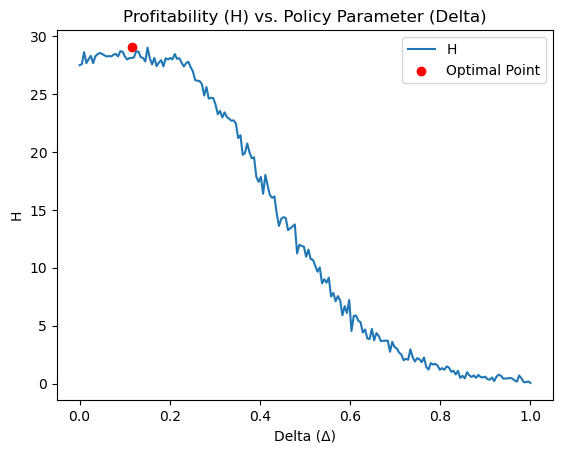

Optimal Delta: 0.11666094284120102
Max H: 29.07539379978804


In [100]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Set a seed for reproducibility

# Define the number of shock series
K = 250

# Initialize variables
H_values = []
delta_range = np.linspace(0, 1, num=200)  # Adjust the range as needed

# Define additional parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
eta = 0.5
w = 1.0

# Define the objective function to minimize
def objective(delta):
    H = 0

    # Simulate shock series
    for k in range(K):
        kappa = np.zeros(120)
        epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=120)

        # Generate shock series for 120 months
        for t in range(120):
            if t == 0:
                kappa[t] = 1  # Initial shock
            else:
                kappa[t] = np.exp(np.log(kappa[t - 1]) * rho + epsilon[t])

        # Calculate the ex post value of the salon for the shock series
        h = 0
        ell_previous = 0
        profits = np.zeros(120)
        adjustment_costs = np.zeros(120)

        for t in range(120):
            ell_star = ((1 - eta) * kappa[t] / w) ** (1 / eta)  # Policy with Δ = 0
            if np.abs(ell_previous - ell_star) > delta:
                ell_t = ell_star
            else:
                ell_t = ell_previous

            profits[t] = kappa[t] * ell_t ** (1 - eta) - w * ell_t
            adjustment_costs[t] = 0 if ell_t == ell_previous else iota
            ell_previous = ell_t

            h += R ** -t * (profits[t] - adjustment_costs[t])

        H += h

    # Calculate the average ex post value
    H /= K

    return -H  # Minimize the negative H value

# Find the optimal delta using an optimization algorithm
result = minimize_scalar(objective, bounds=(0, 0.2), method='bounded')

optimal_delta = result.x
max_H = -result.fun

# Store H values
for delta in delta_range:
    H_values.append(-objective(delta))

# Plot H vs. delta
plt.plot(delta_range, H_values, label='H')
plt.scatter(optimal_delta, max_H, color='red', label='Optimal Point')
plt.xlabel('Delta (Δ)')
plt.ylabel('H')
plt.title('Profitability (H) vs. Policy Parameter (Delta)')
plt.legend()
plt.show()

# Output optimal H and delta
print("Optimal Delta:", optimal_delta)
print("Max H:", max_H)



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [101]:
import numpy as np

np.random.seed(0)  # Set a seed for reproducibility

# Define the number of shock series
K = 250

# Initialize variables
H = 0

# Define additional parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
eta = 0.5
w = 1.0

visualize = []

# Simulate shock series
for k in range(K):
    kappa = np.zeros(120)
    epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=120)

    # Generate shock series for 120 months
    for t in range(120):
        if t == 0:
            kappa[t] = 1  # Initial shock
        else:
            kappa[t] = np.exp(np.log(kappa[t - 1]) * rho + epsilon[t])

    # Calculate the ex post value of the salon for the shock series
    h = 0
    ell_previous = 0
    profits = np.zeros(120)
    adjustment_costs = np.zeros(120)

    for t in range(120):
        ell_t = ((1 - eta) * kappa[t] / (1 + 0.1 * ell_previous)) ** (1 / eta)  # Modified policy with wage decrease
        if ell_previous == 0:
            w = 1 # Set the wage for the first worker to 1
        elif ell_t - ell_previous > 0.007:
            w = w * 0.987
        elif ell_t - ell_previous < 0.007:
            w = w * 1.009
        else:
            w = w
        profits[t] = kappa[t] * ell_t ** (1 - eta) - w * ell_t
        adjustment_costs[t] = 0 if ell_t == ell_previous else iota
        ell_previous = ell_t

        h += R ** -t * (profits[t] - adjustment_costs[t])

    H += h

# Calculate the average ex post value
H /= K

print("H:", H)


H: 28.23014098274338


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [102]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

K_warmup = 10:
Final Solution: [-8.48060098e-09  5.55288883e-10]
Number of Iterations: 277
-------------------------


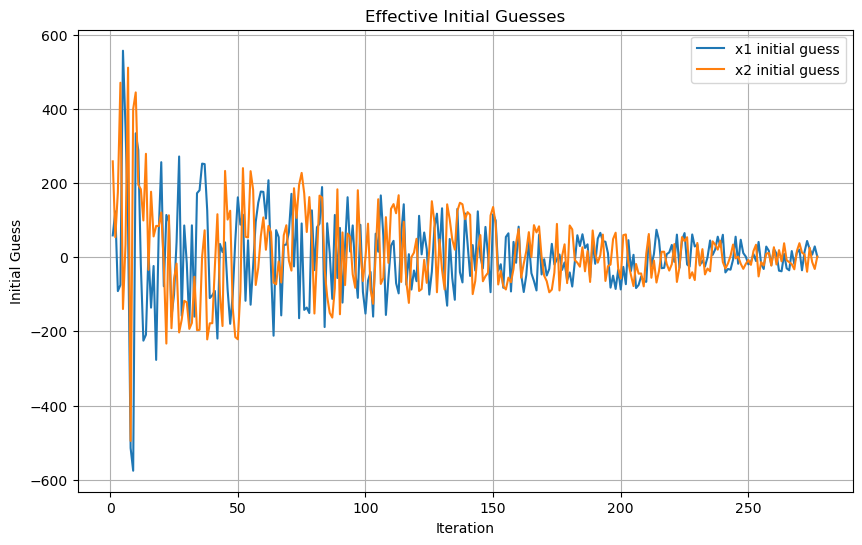

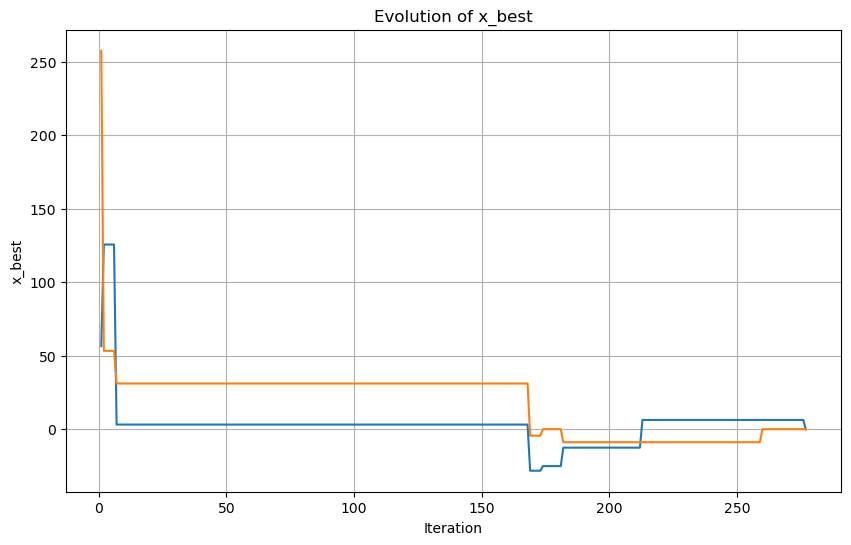

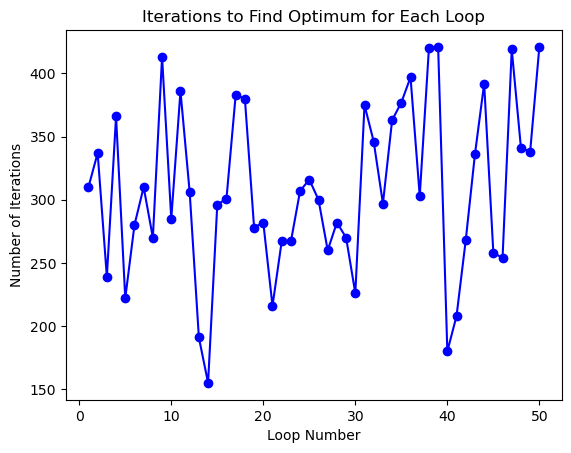

In [191]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the refined global optimizer with multi-start
def refined_global_optimizer(bounds, tolerance, K_warmup, K_max):
    x_best = None  # Initialize the best solution
    f_best = None  # Initialize the best function value
    iterations = 0  # Initialize the iteration count
    initial_guesses = []  # Initialize a list to store initial guesses
    x_best_values = []  # Initialize a list to store x_best values

    for k in range(K_max):
        iterations += 1  # Increment the iteration count
        x = np.random.uniform(bounds[0], bounds[1], size=2)  # Random initial guess
        if k < K_warmup:
            x
        else:
            chi = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))  # Calculate chi
            x = chi * x + (1 - chi) * x_best  # Calculate x^k0

        initial_guesses.append(x)  # Store the initial guess

        # Run optimizer with BFGS method
        result = minimize(griewank, x, method='BFGS', tol=tolerance)
        x_k_ast = result.x  # Get the result x^{k*}
        f_k_ast = result.fun  # Get the function value f(x^{k*})

        # Update the best solution and function value
        if f_best is None or f_k_ast < f_best:
            x_best = x_k_ast
            f_best = f_k_ast

        x_best_values.append(x_best)  # Store x_best

        # Print the effective initial guess for each iteration
        #print(f"Iteration {iterations}: x^k0 = {x}", "x_best", x_best)

        # Check if the stopping criterion is met
        if f_best < tolerance:
            break

    return x_best, iterations, initial_guesses, x_best_values




# Set the settings
bounds = [-600, 600]
tolerance = 1e-8
K_warmup = 10
K_max = 1000

# Set the random seed
np.random.seed(0)


# Run the refined global optimizer
best_solution, num_iterations, initial_guesses, x_best_values = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)


# Print the final solution and the number of iterations
print(f"K_warmup = {K_warmup}:")
print("Final Solution:", best_solution)
print("Number of Iterations:", num_iterations)
print("-------------------------")


# Plot the initial guesses
x_values = np.arange(1, num_iterations + 1)
x1_initial = [x[0] for x in initial_guesses]
x2_initial = [x[1] for x in initial_guesses]

plt.figure(figsize=(10, 6))
plt.plot(x_values, x1_initial, label='x1 initial guess')
plt.plot(x_values, x2_initial, label='x2 initial guess')
plt.xlabel('Iteration')
plt.ylabel('Initial Guess')
plt.title('Effective Initial Guesses')
plt.legend()
plt.grid(True)
plt.show()


# Plot the evolution of x_best
plt.figure(figsize=(10, 6))
plt.plot(x_values, x_best_values)
plt.xlabel('Iteration')
plt.ylabel('x_best')
plt.title('Evolution of x_best')
plt.grid(True)
plt.show()

# Run the refined global optimizer 50 times and store iteration counts
iteration_counts_all = []
for loop in range(1, 51):
    _, iteration_counts, _, _ = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)
    iteration_counts_all.append(iteration_counts)

mean_iterations_10 = np.mean(iteration_counts_all)


# Plot the iteration counts for each run
plt.plot(range(1, 51), iteration_counts_all, 'bo-')
plt.xlabel("Loop Number")
plt.ylabel("Number of Iterations")
plt.title("Iterations to Find Optimum for Each Loop")
plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

K_warmup = 100:
Final Solution: [-7.01600503e-09 -2.23723360e-09]
Number of Iterations: 490
-------------------------


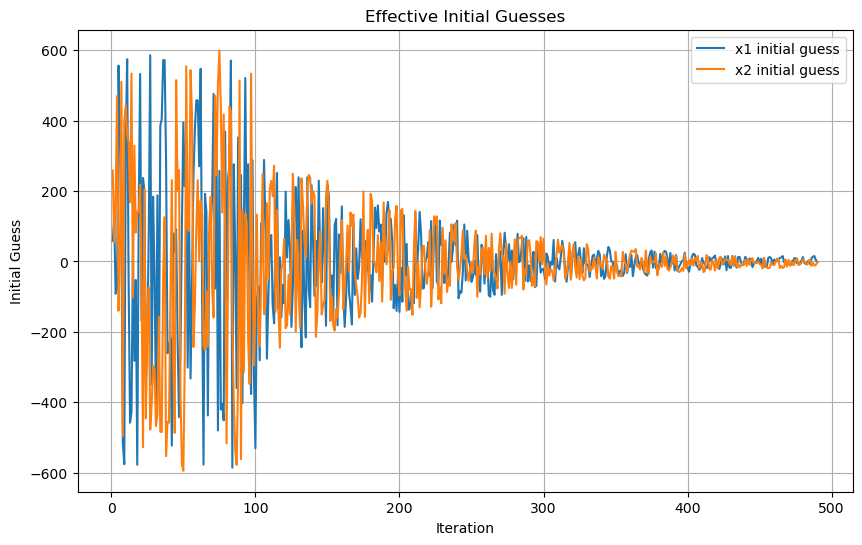

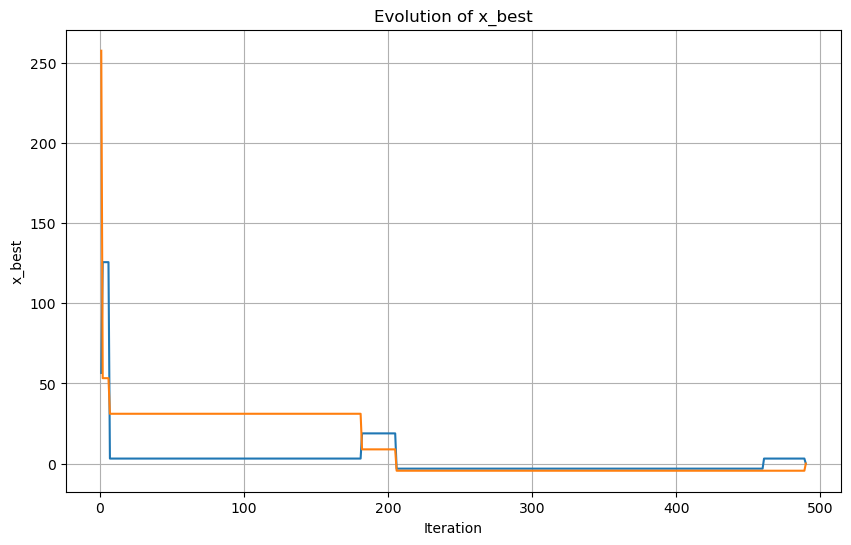

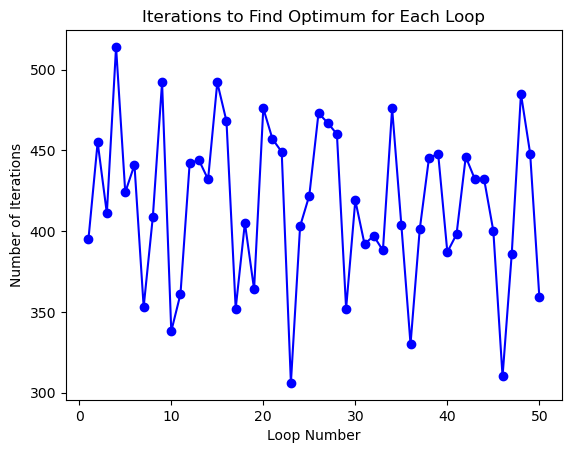

In [192]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the refined global optimizer with multi-start
def refined_global_optimizer(bounds, tolerance, K_warmup, K_max):
    x_best = None  # Initialize the best solution
    f_best = None  # Initialize the best function value
    iterations = 0  # Initialize the iteration count
    initial_guesses = []  # Initialize a list to store initial guesses
    x_best_values = []  # Initialize a list to store x_best values

    for k in range(K_max):
        iterations += 1  # Increment the iteration count
        x = np.random.uniform(bounds[0], bounds[1], size=2)  # Random initial guess
        if k < K_warmup:
            x
        else:
            chi = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))  # Calculate chi
            x = chi * x + (1 - chi) * x_best  # Calculate x^k0

        initial_guesses.append(x)  # Store the initial guess

        # Run optimizer with BFGS method
        result = minimize(griewank, x, method='BFGS', tol=tolerance)
        x_k_ast = result.x  # Get the result x^{k*}
        f_k_ast = result.fun  # Get the function value f(x^{k*})

        # Update the best solution and function value
        if f_best is None or f_k_ast < f_best:
            x_best = x_k_ast
            f_best = f_k_ast

        x_best_values.append(x_best)  # Store x_best

        # Print the effective initial guess for each iteration
        #print(f"Iteration {iterations}: x^k0 = {x}", "x_best", x_best)

        # Check if the stopping criterion is met
        if f_best < tolerance:
            break

    return x_best, iterations, initial_guesses, x_best_values




# Set the settings
bounds = [-600, 600]
tolerance = 1e-8
K_warmup = 100
K_max = 1000

# Set the random seed
np.random.seed(0)


# Run the refined global optimizer
best_solution, num_iterations, initial_guesses, x_best_values = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)


# Print the final solution and the number of iterations
print(f"K_warmup = {K_warmup}:")
print("Final Solution:", best_solution)
print("Number of Iterations:", num_iterations)
print("-------------------------")


# Plot the initial guesses
x_values = np.arange(1, num_iterations + 1)
x1_initial = [x[0] for x in initial_guesses]
x2_initial = [x[1] for x in initial_guesses]

plt.figure(figsize=(10, 6))
plt.plot(x_values, x1_initial, label='x1 initial guess')
plt.plot(x_values, x2_initial, label='x2 initial guess')
plt.xlabel('Iteration')
plt.ylabel('Initial Guess')
plt.title('Effective Initial Guesses')
plt.legend()
plt.grid(True)
plt.show()


# Plot the evolution of x_best
plt.figure(figsize=(10, 6))
plt.plot(x_values, x_best_values)
plt.xlabel('Iteration')
plt.ylabel('x_best')
plt.title('Evolution of x_best')
plt.grid(True)
plt.show()

# Run the refined global optimizer 50 times and store iteration counts
iteration_counts_all = []
for loop in range(1, 51):
    _, iteration_counts, _, _ = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)
    iteration_counts_all.append(iteration_counts)

mean_iterations_100 = np.mean(iteration_counts_all)


# Plot the iteration counts for each run
plt.plot(range(1, 51), iteration_counts_all, 'bo-')
plt.xlabel("Loop Number")
plt.ylabel("Number of Iterations")
plt.title("Iterations to Find Optimum for Each Loop")
plt.show()


In [193]:
# Is the convergence faster

difference = mean_iterations_10 - mean_iterations_100
print("mean iteration count for K_ = 10:", mean_iterations_10)
print("mean iteration count for K_ = 100:",mean_iterations_100)
print("Difference between the two mean iteration counts", difference)

mean iteration count for K_ = 10: 308.3
mean iteration count for K_ = 100: 416.8
Difference between the two mean iteration counts -108.5
